# Import Libraries

In [1]:
import scipy as sp
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as plotly
import re
import collections
import operator
from PIL import Image

# Get Train & Test Set

In [2]:
train_directory = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset'

classes = os.listdir(train_directory)
class_indices = np.arange(len(classes))

class_dict = dict(zip(classes, class_indices))
class_dict, len(class_dict)

({'abraham_grampa_simpson': 0,
  'agnes_skinner': 1,
  'apu_nahasapeemapetilon': 2,
  'barney_gumble': 3,
  'bart_simpson': 4,
  'bumblebee_man': 5,
  'carl_carlson': 6,
  'charles_montgomery_burns': 7,
  'chief_wiggum': 8,
  'cletus_spuckler': 9,
  'comic_book_guy': 10,
  'disco_stu': 11,
  'edna_krabappel': 12,
  'fat_tony': 13,
  'gil': 14,
  'groundskeeper_willie': 15,
  'hans_moleman': 16,
  'helen_lovejoy': 17,
  'homer_simpson': 18,
  'jasper_beardly': 19,
  'jimbo_jones': 20,
  'kent_brockman': 21,
  'krusty_the_clown': 22,
  'lenny_leonard': 23,
  'lionel_hutz': 24,
  'lisa_simpson': 25,
  'maggie_simpson': 26,
  'marge_simpson': 27,
  'martin_prince': 28,
  'mayor_quimby': 29,
  'milhouse_van_houten': 30,
  'miss_hoover': 31,
  'moe_szyslak': 32,
  'ned_flanders': 33,
  'nelson_muntz': 34,
  'otto_mann': 35,
  'patty_bouvier': 36,
  'principal_skinner': 37,
  'professor_john_frink': 38,
  'rainier_wolfcastle': 39,
  'ralph_wiggum': 40,
  'selma_bouvier': 41,
  'sideshow_bob':

In [3]:
# Loop over each folder of train directory and read pictures, storing pixel matrix, character-name, and label id
main = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0000.jpg'
train_scaled = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_train_scaled/'


def resizeTrainImages():
    for item in classes:
        dirToRead = train_directory + '/' + item
        dirToSave = train_scaled + item
        
        if(os.path.exists(dirToSave)):
            print('Directory already exists')
        else:
#             print('No dir')
            os.makedirs(train_scaled + item)
        
        pics = os.listdir(dirToRead)
        for pic in pics:
            if(pic != '.DS_Store'):
                fullPathRead = dirToRead + '/' + pic
                fullPathSave = dirToSave + '/' + pic
                if(os.path.exists(fullPathSave)):
                    print("File Exists")
                else:
                    im = Image.open(fullPathRead)
                    imResize = im.resize((24,24), Image.ANTIALIAS)
                    imResize.save(fullPathSave, 'JPEG', quality=90)
resizeTrainImages()


Directory already exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
Fil

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
Directory already exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
Fil

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
Directory already exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
Fil

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
Directory already exists
Directory already exists
Directory already exists
File Exists
File Exists
File Exists
F

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
Directory already exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
Directory already exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
Fi

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
Directory already exists
File Exists
File Exists
File Exists
Fil

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
Directory already exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
Fil

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

In [4]:
trainObj = []

for dirs in classes:
    directory = train_scaled + dirs + '/'
    pics = os.listdir(directory)
    for pic in pics:
        path = directory + pic
        pix = sp.misc.imread(path)
        trainObj.append([pix, dirs, class_dict[dirs]])
        
trainObj = np.array(trainObj)
trainObj.shape, trainObj[0][0].shape

/home/gclarkjr5/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

`imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.



((20933, 3), (24, 24, 3))

In [5]:
# Resize all test images and place in folder
test_directory = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset'
test_scaled = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_test_scaled'

def resizeTestImages():        
        pics = os.listdir(test_directory)
        for pic in pics:
            if(pic != '.DS_Store'):
                fullPathRead = test_directory + '/' + pic
                fullPathSave = test_scaled + '/' + pic
                if(os.path.exists(fullPathSave)):
                    print("File Exists")
                else:
                    im = Image.open(fullPathRead)
                    imResize = im.resize((24,24), Image.ANTIALIAS)
                    imResize.save(fullPathSave, 'JPEG', quality=90)
resizeTestImages()

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File Exists
File

In [6]:
# Get all test images into a similar format given the one directory they are all in
test_pics = os.listdir(test_scaled)
ids = []
for pic in test_pics:
    if pic != '.DS_Store':
        path = test_scaled + '/' + pic
        pix_array = sp.misc.imread(path)
        character_label = re.sub('_[0-9]{1,2}.jpg$', '', pic)
        ids.append([pix_array, character_label, class_dict[character_label]])
testObj = np.array(ids)
testObj.shape, testObj[0][0].shape

/home/gclarkjr5/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

`imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.



((990, 3), (24, 24, 3))

# Print out the first 10 pics

/home/gclarkjr5/tensorflow/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning:

Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



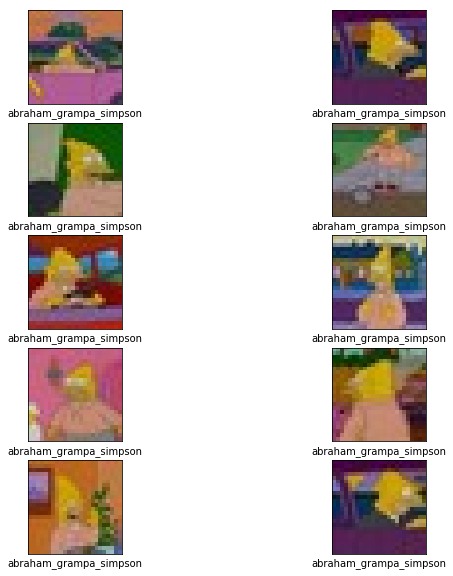

In [7]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(len(trainObj[0:10])):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(trainObj[i][0], cmap=plt.cm.binary)
    plt.xlabel(trainObj[i][1])

# PreProcess and convert 0-255 RGB to 0-1 range

In [8]:
def preProcess(obj):
    for i in range(len(obj)):
        obj[i][0] = obj[i][0]/255

preProcess(trainObj)
preProcess(testObj)

trainObj.shape, testObj.shape


((20933, 3), (990, 3))

In [9]:
def imagesOrLabels(data, index):
    vec = list(map(lambda x: x[index], data))
    vec = np.array(vec)
    return(vec)

    
train_images = imagesOrLabels(trainObj, 0)
train_labels = imagesOrLabels(trainObj, 2)

test_images = imagesOrLabels(testObj, 0)
test_labels = imagesOrLabels(testObj, 2)


train_images.shape, test_images.shape

((20933, 24, 24, 3), (990, 24, 24, 3))

# Model Construction

## Model Layers

In [10]:
model_classes = len(class_dict)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(24, 24, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(model_classes, activation=tf.nn.softmax)
])

## Model Functions (optimizer, accuracy)

In [11]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fit Model

In [12]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
20933/20933 [==============================] - 5s 219us/step - loss: 2.7439 - acc: 0.2443
Epoch 2/5
20933/20933 [==============================] - 4s 209us/step - loss: 2.4334 - acc: 0.3356
Epoch 3/5
20933/20933 [==============================] - 4s 209us/step - loss: 2.3238 - acc: 0.3666
Epoch 4/5
20933/20933 [==============================] - 4s 210us/step - loss: 2.2553 - acc: 0.3822
Epoch 5/5
20933/20933 [==============================] - 4s 215us/step - loss: 2.1970 - acc: 0.3953


# Evaluate Accuracy w/ Test Set

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

990/990 [==============================] - 0s 156us/step
Test accuracy: 0.40909090927152925
